<a href="https://colab.research.google.com/github/iamab3/Natural-Language-Processing_Text-Pre-processing/blob/main/NLP_Text_Preprocessing_Hotel_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Importing libraries
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [6]:
# Ensuring all the words are in lowercase
data['Review_lower'] = data['Review'].str.lower()

In [7]:
data.head()

,Review,Rating,Review_lower
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


In [10]:
# Creating out list of stopwords in English language
en_stopwords = stopwords.words('english')

In [11]:
# Removing "not" from the stopwords
en_stopwords.remove('not')

In [12]:
# Creating a new column with no stopwords
data['Review_no_stopwords'] = data['Review_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))

In [13]:
data.head()

,Review,Rating,Review_lower,Review_no_stopwords
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [14]:
data['Review_no_stopwords'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,'

In [18]:
# Keeping star in the reviews as it might have some meaning
data['Review_no_stopwords_no_punc'] = data.apply(lambda x: re.sub(r'[*]', 'star', x['Review_no_stopwords']), axis=1)

In [16]:
data.head()

,Review,Rating,Review_lower,Review_no_stopwords,Review_no_stopwords_no_punc
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [19]:
# Removing rest of the punctuations
data['Review_no_stopwords_no_punc'] = data.apply(lambda x: re.sub(r'[^\w\s]', '', x['Review_no_stopwords_no_punc']), axis=1)

In [20]:
data.head()

,Review,Rating,Review_lower,Review_no_stopwords,Review_no_stopwords_no_punc
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


In [23]:
# Tokenise the text
data['Review_tokenised'] = data.apply(lambda x: word_tokenize(x['Review_no_stopwords_no_punc']), axis=1)

In [24]:
data['Review_tokenised'][0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [25]:
# Stemming the review
ps = PorterStemmer()
data['Review_stemmed'] = data['Review_tokenised'].apply(lambda tokens: [ps.stem(token) for token in tokens])

In [26]:
data['Review_stemmed'][0]

['nice',
 'hotel',
 'expens',
 'park',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversari',
 'arriv',
 'late',
 'even',
 'took',
 'advic',
 'previou',
 'review',
 'valet',
 'park',
 'check',
 'quick',
 'easi',
 'littl',
 'disappoint',
 'nonexist',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfort',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillow',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morn',
 'loud',
 'bang',
 'door',
 'open',
 'close',
 'hear',
 'peopl',
 'talk',
 'hallway',
 'mayb',
 'noisi',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantag',
 'stay',
 'longer',
 'locat',
 'great',
 'walk',
 'distanc',
 'shop',
 'overal',
 'nice',
 'experi',
 'pay',
 '40',
 'park',
 'night']

In [27]:
data.head()

,Review,Rating,Review_lower,Review_no_stopwords,Review_no_stopwords_no_punc,Review_tokenised,Review_stemmed
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...,"[nice, rooms, not, 4star, experience, hotel, m...","[nice, room, not, 4star, experi, hotel, monaco..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [28]:
# Lemmatizing the tokens
lemmatizer = WordNetLemmatizer()

In [31]:
data['Lemmatized'] = data['Review_tokenised'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [32]:
data.head()

,Review,Rating,Review_lower,Review_no_stopwords,Review_no_stopwords_no_punc,Review_tokenised,Review_stemmed,Lemmatized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...,"[nice, rooms, not, 4star, experience, hotel, m...","[nice, room, not, 4star, experi, hotel, monaco...","[nice, room, not, 4star, experience, hotel, mo..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [33]:
# Creating single list of cleaned tokens
tokens_clean = sum(data['Lemmatized'], [])

In [34]:
# Looking for Unigrams
unigrams = (pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts())
print(unigrams)

(hotel,)           292
(room,)            275
(great,)           126
(not,)             122
(stay,)             95
                  ... 
(singaporewe,)       1
(australian,)        1
(australiaour,)      1
(exception,)         1
(nightyou,)          1
Name: count, Length: 2589, dtype: int64


In [35]:
# Looking for Bigrams
bigrams = (pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts())
print(bigrams)

(great, location)     24
(space, needle)       21
(hotel, monaco)       16
(staff, friendly)     12
(great, view)         12
                      ..
(room, starting)       1
(changed, 3)           1
(warwick, changed)     1
(trip, 3)              1
(right, downtown)      1
Name: count, Length: 8263, dtype: int64


In [36]:
# Looking for Trigrams
trigrams = (pd.Series(nltk.ngrams(tokens_clean, 3)).value_counts())
print(trigrams)

(pike, place, market)              8
(view, space, needle)              5
(hotel, great, location)           5
(staff, friendly, helpful)         4
(stayed, inn, market)              4
                                  ..
(dissapointment, trip, 3)          1
(trip, 3, night)                   1
(3, night, stay)                   1
(night, stay, warwick)             1
(travel, agency, unfortunately)    1
Name: count, Length: 9288, dtype: int64


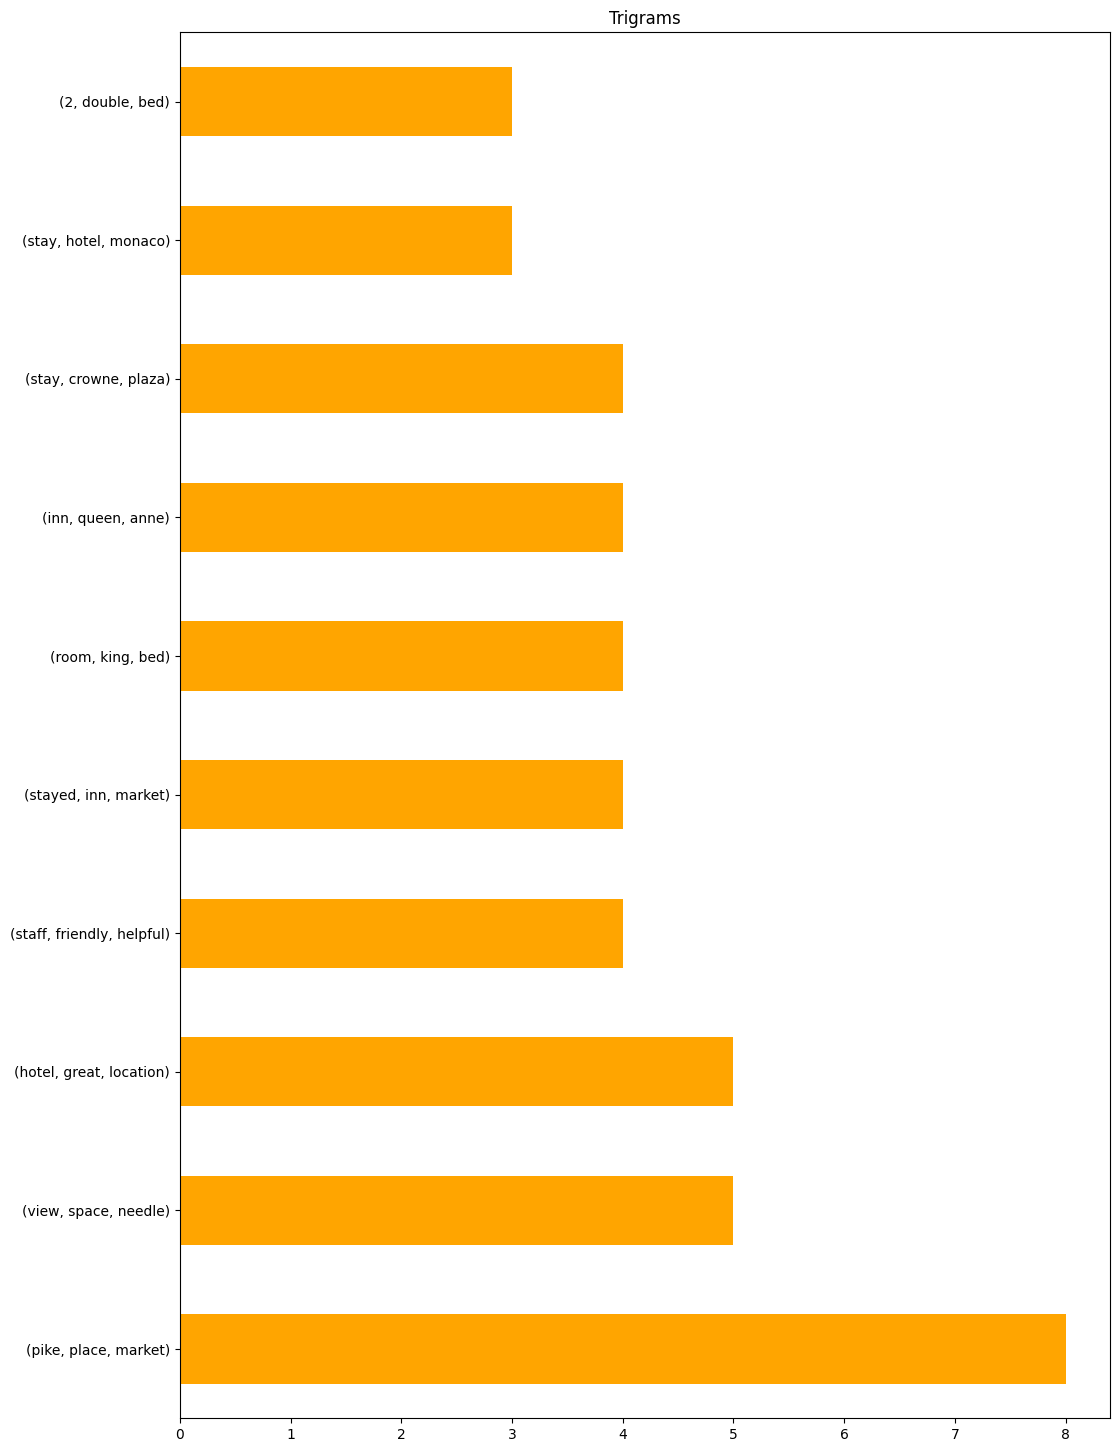

In [43]:
# Plotting trigrams
trigrams[:10].plot.barh(figsize=(12,18), color = 'orange')
plt.title('Trigrams')
plt.show()

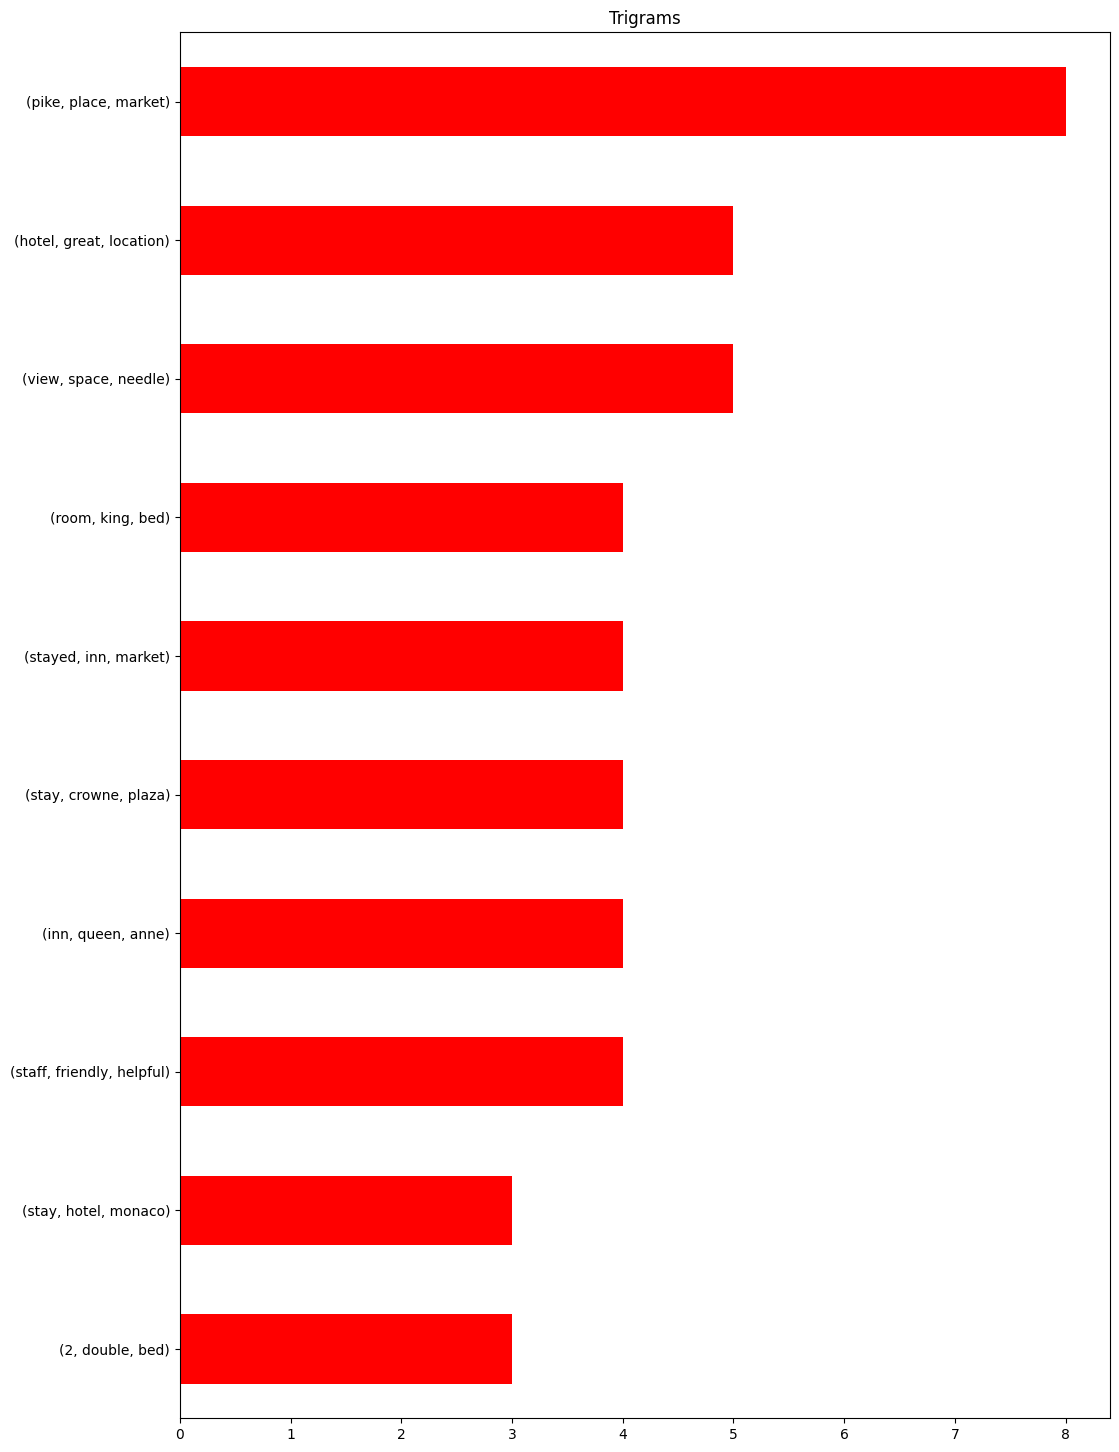

In [44]:
# Plotting trigrams in reverse
trigrams[:10].sort_values().plot.barh(figsize=(12,18), color = 'red')
plt.title('Trigrams')
plt.show()